# Import library

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import itertools
import warnings

import math

# Data processing

In [5]:
df = pd.read_csv('retail_clean.csv')

In [6]:
df = df[['Quantity', 'InvoiceDate']]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d/%m/%Y %H:%M")
df.head()

,Quantity,InvoiceDate
0,12,2009-12-01 07:45:00
1,12,2009-12-01 07:45:00
2,12,2009-12-01 07:45:00
3,48,2009-12-01 07:45:00
4,24,2009-12-01 07:45:00


In [7]:
df = df.set_index('InvoiceDate')

In [8]:
df = df.resample('M').sum()
df

,Quantity
InvoiceDate,
2009-12-31,398708
2010-01-31,370128
2010-02-28,371871
2010-03-31,502101
2010-04-30,350604
2010-05-31,384960
2010-06-30,389880
2010-07-31,324638
2010-08-31,452551


In [9]:
monthly_data = df['Quantity']
monthly_data

InvoiceDate
2009-12-31    398708
2010-01-31    370128
2010-02-28    371871
2010-03-31    502101
2010-04-30    350604
2010-05-31    384960
2010-06-30    389880
2010-07-31    324638
2010-08-31    452551
2010-09-30    567806
2010-10-31    596497
2010-11-30    653074
2010-12-31    311063
2011-01-31    348522
2011-02-28    265043
2011-03-31    347623
2011-04-30    291369
2011-05-31    372948
2011-06-30    363014
2011-07-31    367372
2011-08-31    398190
2011-09-30    543654
2011-10-31    591551
2011-11-30    678760
2011-12-31    286778
Freq: M, Name: Quantity, dtype: int64

<Axes: xlabel='InvoiceDate'>

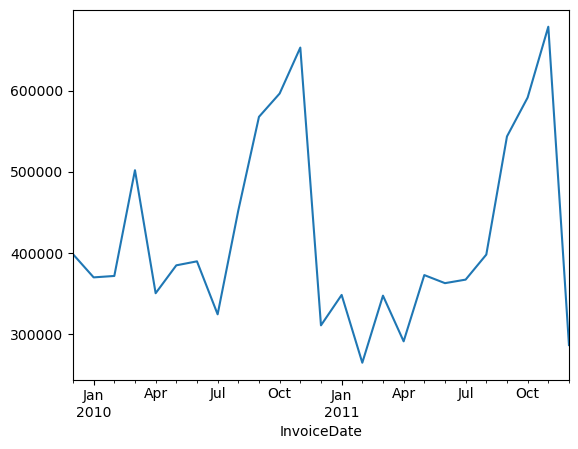

In [10]:
monthly_data.plot()

# Decomposing trend, seasonality, remainder

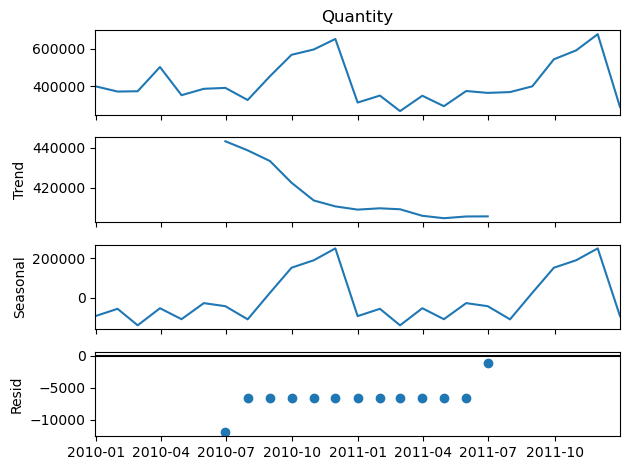

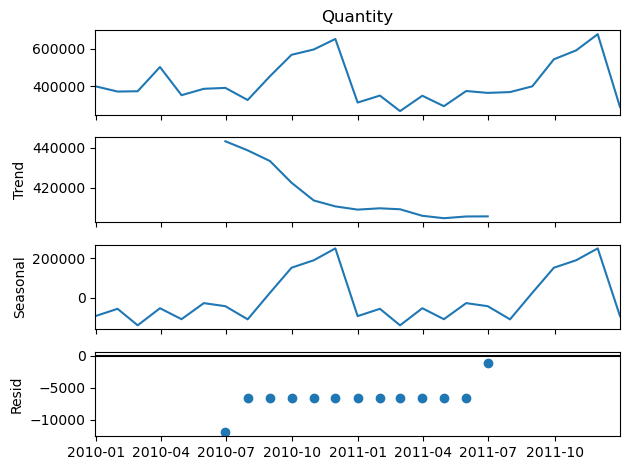

In [12]:
demand_components = sm.tsa.seasonal_decompose(monthly_data, model = 'additive', period = 12)
demand_components.plot()

# Moving Average

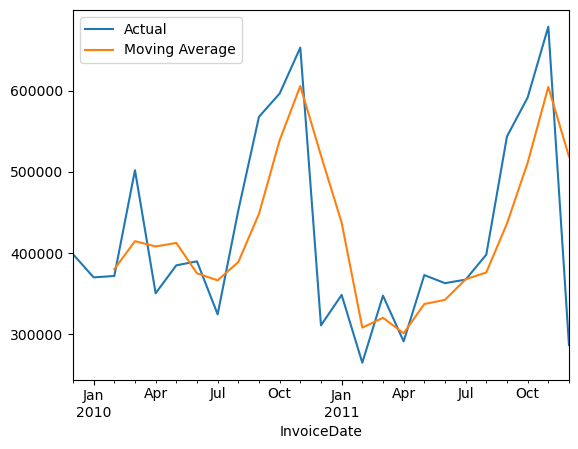

In [14]:
monthly_data.plot(label = 'Actual')
monthly_data.rolling(window = 3).mean().plot(label = 'Moving Average')
plt.legend()
plt.show()

In [15]:
test_1 = sm.tsa.stattools.adfuller(monthly_data, autolag = 'AIC')
test_1

(-3.356898142962888,
 0.012518958188462936,
 2,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 397.22710967925735)

# ARIMA

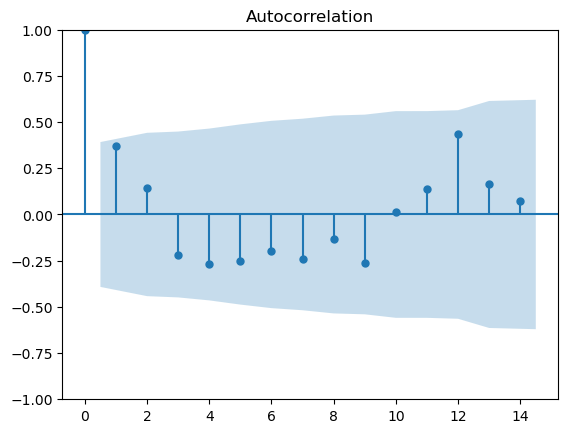

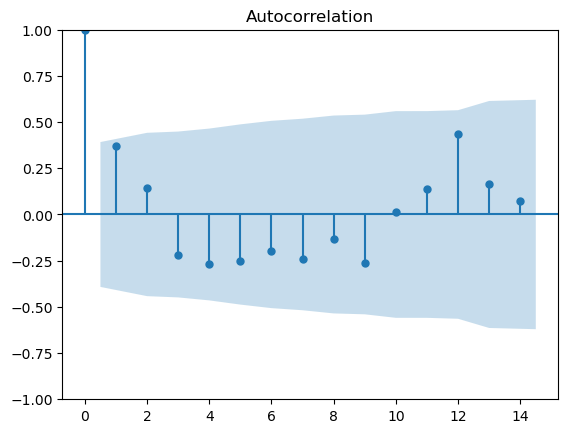

In [17]:
plot_acf(monthly_data)

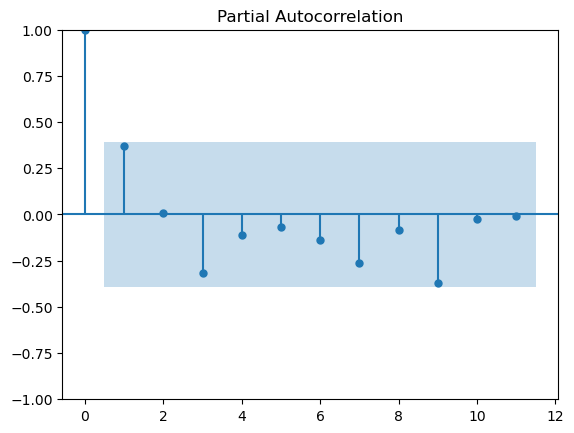

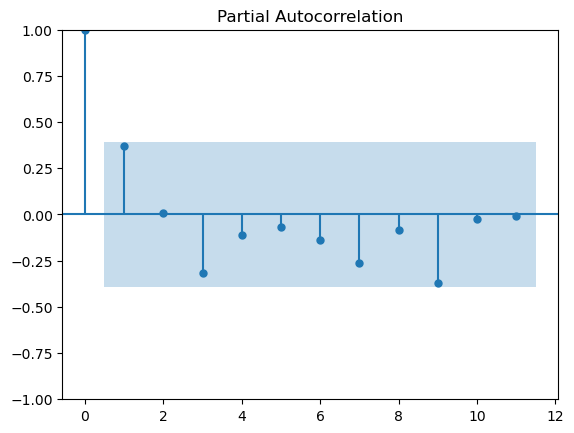

In [18]:
plot_pacf(monthly_data, lags = 11)

In [19]:
ar_model = sm.tsa.statespace.SARIMAX(monthly_data, order = (1,0,0))
ar_result = ar_model.fit()
ar_result.aic

665.3244111102931

In [20]:
ma_model = sm.tsa.statespace.SARIMAX(monthly_data, order = (0,0,1))
ma_result = ma_model.fit()
ma_result.aic

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


708.0230586495464

In [21]:
arma_model = sm.tsa.statespace.SARIMAX(monthly_data, order = (1,0,1))
arma_result = arma_model.fit()
arma_result.aic

666.2593950268304

In [22]:
arima_model = sm.tsa.statespace.SARIMAX(monthly_data, order = (1,1,1))
arima_result = arima_model.fit()
arima_result.aic

638.111410361403

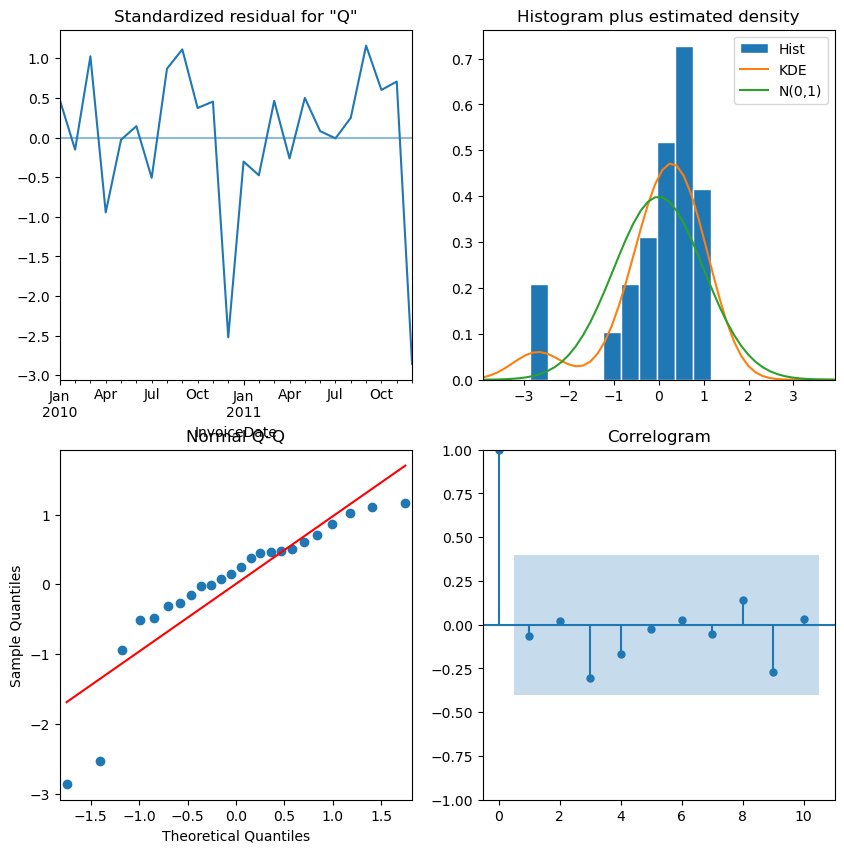

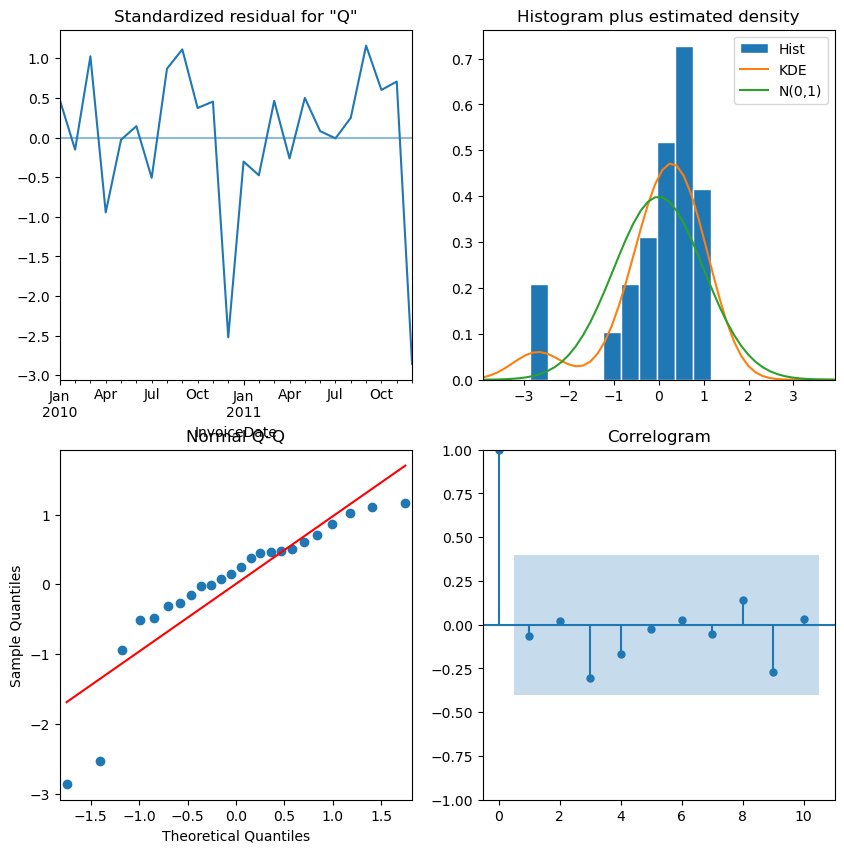

In [23]:
arima_result.plot_diagnostics(figsize = (10,10))

# SARIMAX

In [25]:
P = D = Q = p = d = q = range(0, 3)
S = 12

combinations = list(itertools.product(p, d, q, P, D, Q))

arima_orders = [(x[0], x[1], x[2]) for x in combinations]
seasonal_orders = [(x[3], x[4], x[5], S) for x in combinations]

results_data = pd.DataFrame(columns = ['p', 'd', 'q', 'P', 'D', 'Q', 'AIC'])

In [26]:
for i in range(len(combinations)):
     try:
          model = sm.tsa.statespace.SARIMAX(monthly_data, order = arima_orders[i], seasonal_order = seasonal_orders[i])
          result = model.fit()
          results_data.loc[i,'p'] = arima_orders[i][0]
          results_data.loc[i,'d'] = arima_orders[i][1]
          results_data.loc[i,'q'] = arima_orders[i][2]
          results_data.loc[i,'P'] = seasonal_orders[i][0]
          results_data.loc[i,'D'] = seasonal_orders[i][1]
          results_data.loc[i,'Q'] = seasonal_orders[i][2]
          results_data.loc[i,'AIC'] = result.aic
     except:
          continue

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observation

In [27]:
results_data[results_data.AIC == min(results_data.AIC)]

,p,d,q,P,D,Q,AIC
87,0,1,0,0,2,0,2.0
168,0,2,0,0,2,0,2.0


C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


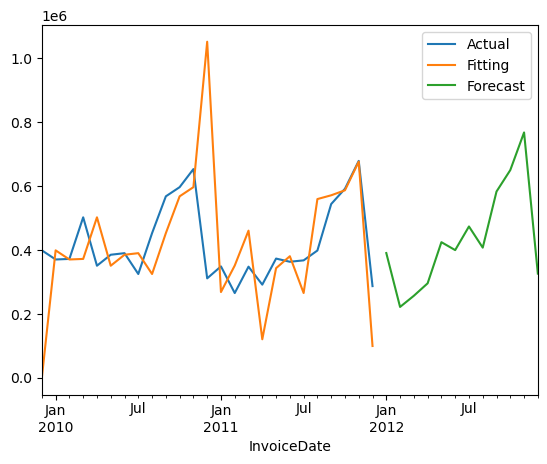

In [28]:
best_model = sm.tsa.statespace.SARIMAX(monthly_data, order = (0, 1, 0), seasonal_order = (0, 2, 0, 12))
best_result = best_model.fit()

fitting = best_result.get_prediction(start = '2009-12-31')
fitting_mean = fitting.predicted_mean

forecast = best_result.get_forecast(steps = 12)
forecast_mean = forecast.predicted_mean

monthly_data.plot(label = 'Actual')
fitting_mean.plot(label = 'Fitting')
forecast_mean.plot(label = 'Forecast')
plt.legend()

In [29]:
sq_error = (monthly_data - fitting_mean)**2
rmse_arima = math.sqrt(sq_error.mean())
print(f''' RMSE: {rmse_arima}''')

mae_arima = abs((monthly_data - fitting_mean).mean())
print(f''' MAE: {mae_arima}''')

 RMSE: 191502.9290613796
 MAE: 3439.55333333335


# Exponential Smoothing

In [31]:
expo_model_1 = ExponentialSmoothing(monthly_data, trend = 'add', seasonal = 'add', seasonal_periods = 12)
expo_model_2 = ExponentialSmoothing(monthly_data, trend = 'add', seasonal = 'mul', seasonal_periods = 12)
expo_model_3 = ExponentialSmoothing(monthly_data, trend = 'mul', seasonal = 'add', seasonal_periods = 12)
expo_model_4 = ExponentialSmoothing(monthly_data, trend = 'mul', seasonal = 'mul', seasonal_periods = 12)

In [32]:
fit_1 = expo_model_1.fit().predict(0, len(monthly_data))
fit_2 = expo_model_2.fit().predict(0, len(monthly_data))
fit_3 = expo_model_3.fit().predict(0, len(monthly_data))
fit_4 = expo_model_4.fit().predict(0, len(monthly_data))

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [33]:
mae1 = abs(monthly_data - fit_1).mean()
mae2 = abs(monthly_data - fit_2).mean()
mae3 = abs(monthly_data - fit_3).mean()
mae4 = abs(monthly_data - fit_4).mean()

In [34]:
print({mae1}, {mae2}, {mae3}, {mae4})

{24793.966367657762} {27767.091298417105} {24686.010075485174} {27416.132315633215}


In [35]:
rmse1 = math.sqrt(((monthly_data - fit_1)**2).mean())
rmse2 = math.sqrt(((monthly_data - fit_2)**2).mean())
rmse3 = math.sqrt(((monthly_data - fit_3)**2).mean())
rmse4 = math.sqrt(((monthly_data - fit_4)**2).mean())

In [36]:
print({rmse1}, {rmse2}, {rmse3}, {rmse4})

{36861.03753754127} {38075.48399699434} {36617.244549135} {37850.34942633009}


In [37]:
forecast_expo3 = expo_model_3.fit().predict(0, len(monthly_data)+12)

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


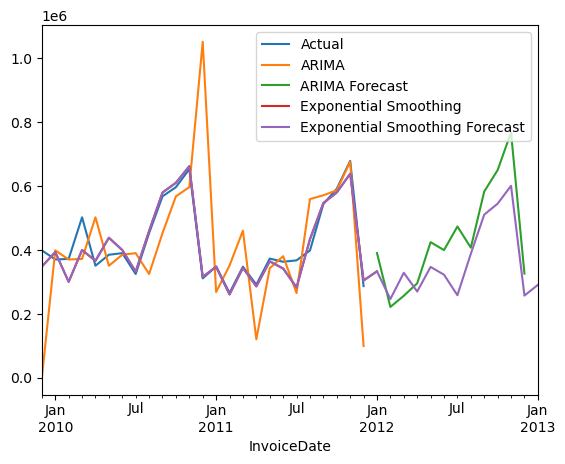

In [38]:
monthly_data.plot(label = 'Actual')
fitting_mean.plot(label = 'ARIMA')
forecast_mean.plot(label = 'ARIMA Forecast')

fit_3.plot(label = 'Exponential Smoothing')
forecast_expo3.plot(label = 'Exponential Smoothing Forecast')

plt.legend()
plt.show()